In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase 8: Sistemas y suma de convolución</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### Sistemas en tiempo discreto
> + **Definición**.
>> + Un sistema en tiempo discreto está definido matemáticamente como una transformación que mapea una señal discreta de entrada con valores $x[n]$ en una secuencia de salida con valores $y[n]$. Esto es,
$$
\begin{align*}
y[n] &= T\big\{x[n]\big\}
\end{align*}
$$
>> + O equivalentemente,
$$
\begin{align*}
x[n] \xrightarrow[]{T}y[n]
\end{align*}
$$



<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="LTI.png" width="480" height="480" alt="Tiny"></a>
    <strong>Figure 1. Representación de un sistema en tiempo discreto.</strong>
    
> + Ejemplo:
    + 1) Un sistema llamado sistema de retardo (__shifteo__):
$$
\begin{align*}
y[n] &= x[n-n_{d}],\quad -\infty<n<\infty
\end{align*}
$$

    


### Propiedades de los sistemas:

> + **Sistema invariante en el tiempo**.
>> + La propiedad de invariancia en el tiempo quiere decir que las características de entrada y salida NO cambian con el tiempo:

>> + Un sistema es invariante en el tiempo si y sólo si:

$$
\begin{align*}
x[n] \xrightarrow[]{T}y[n] \implies x[n-n_{0}] \xrightarrow[]{T}y[n-n_{0}], \,\,\,\, \forall \,{\text{entrada}} \,\,\, x[n] \,\,\, {\text{y}} \,\,\, \forall \,\,\, {\text{desplazamiento de tiempo}}\,\, n_{0}.
\end{align*}
$$

<p style="text-align:center">
    <a title="sistema"><img src="invariante.png" width="480" height="480" alt="Tiny"></a>
    <strong>Figure 2. Sistema invariante en el tiempo.</strong>

### Propiedades de los sistemas:

> + **Sistema lineal**.
>> + La propiedad de sistema lineal quiere decir que obedece al principio de superposición:

>> + Un sistema es lineal si y sólo si:

$$
\begin{align*}
T[a_1\cdot x_1[n] + a_2\cdot x_2[n]] = a_1\cdot T[x_1[n]] + a_2\cdot T[x_2[n]] \,\,\,\, {\text{para cualquier secuencia de entrada arbitraria}} \,\,\, x_1[n], {\text{y}}\, x_2[n] \,\,\, {\text{y}} \,\,\, {\text{para cualquier constante arbitraria}} \,\,\, c_1, \,{\text{y}}\, c_2.
\end{align*}
$$

<p style="text-align:center">
    <a title="sistema"><img src="lineal.png" width="480" height="480" alt="Tiny"></a>
    <strong>Figure 3. Sistema lineal.</strong>

### Propiedades de los sistemas:

> + **Sistema causal**.
>> + La propiedad de sistema causal quiere decir que la salida del sistema en cualquier tiempo $n$ solamente depende del instante presente y de entradas pasadas:

>> + Un sistema es causal si y sólo si:
$$
\begin{align*}
y[n] &= F[x[n], x[n-1], x[n-2],\ldots] \,\,\,\, \forall \, n.
\end{align*}
$$

### La suma de convolución:

>> + Sea $h[n]$ la respuesta de un sistema lineal e invariante en el tiempo (LTI, linear time invariant) con transformación $T$, a una secuencia de entrada $h[n]$ :

<p style="text-align:center">
    <a title="sistema"><img src="respuesta_impulso.png" width="380" height="380" alt="Tiny"></a>
    <strong>Figure 4. Respuesta al impulso de un sistema LTI.</strong>


$$
\begin{align*}
\delta[n] \xrightarrow[]{T}h[n]
\end{align*}
$$
    
$$
\begin{align*}
\hspace{0.15cm} \delta[n - k] \xrightarrow[]{T}h[n - k]
\end{align*}
$$ 
    
$$
\begin{align*}
\hspace{0.15cm} \alpha \delta[n - k] \xrightarrow[]{T} \alpha h[n - k]
\end{align*}
$$
    
$$
\begin{align*}
\hspace{0.15cm} x[k] \delta[n - k] \xrightarrow[]{T} x[k] h[n - k]
\end{align*}
$$     
    
$$
\begin{align*}
\hspace{0.15cm} \sum_{k=-\infty}^{\infty} x[k] \delta[n - k] \xrightarrow[]{T} \sum_{k=-\infty}^{\infty} x[k] h[n - k]
\end{align*}
$$
    
$$
\begin{align*}
\hspace{0.15cm} x[n] \xrightarrow[]{T} y[n]
\end{align*}
$$ 
    
>> + Por lo tanto, 
$$
\begin{align*}
\hspace{0.15cm} y[n] =   \sum_{k=-\infty}^{\infty} x[k] h[n - k] = x[n]*h[n], \quad {\text{para cualquier sistema LTI.}}
\end{align*}
$$     
    

#### Ejercicios:
>> + Una señal $x[n]$ está en realidad compuesta de una superposición de muchos impulsos de Dirac, puesto en cada entero, con amplitudes $x[n]$. Mostremos esto en Python.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
L = 10
z = np.zeros(L)
x = np.zeros(L)
x[5:9] = range(4) # Create a sequence of numbers from 0 to 4,
x[0:4] = range(4)
print("x = ", x)

x =  [0. 1. 2. 3. 0. 0. 1. 2. 3. 0.]


In [16]:
s = np.zeros((L,L))
for k in range(L):
    s[k][k] = x[k]
    print(s)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0.

<ipython-input-31-910e0ce5572f>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[k].stem(s[k][:])
<ipython-input-31-910e0ce5572f>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax[k].stem(s[k][:])
<ipython-input-31-910e0ce5572f>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_

Text(0.5, 0.98, 'Una señal como una superposición de impulsos de Dirac')

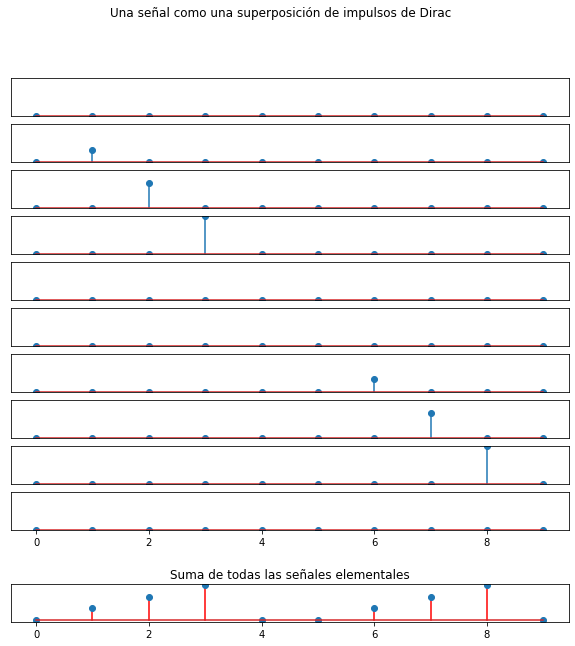

In [31]:
f , ax = plt.subplots(L+2, figsize=(10,10))
for k in range(L):
    ax[k].stem(s[k][:])
    ax[k].set_ylim([0,3])
    ax[k].get_yaxis().set_ticks([])
    if k != L-1: ax[k].get_xaxis().set_ticks([])

ax[L].axis('off')

ax[L+1].get_yaxis().set_ticks([])
ax[L+1].stem(x, linefmt = 'r')
ax[L+1].set_title('Suma de todas las señales elementales')
#f.tight_layout()
f.suptitle('Una señal como una superposición de impulsos de Dirac')

In [15]:
print(s)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### Ejercicios: Ilustrar la suma de convolución

In [32]:
x1 = [1, 2, 3, 4]
x2 = [1, 1, 1]
y = np.convolve(x1, x2)
print(y)

[1 3 6 9 7 4]


<ipython-input-33-3ec15bd81692>:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(y)


<StemContainer object of 3 artists>

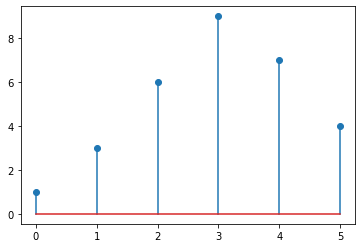

In [33]:
plt.stem(y)

#### Procedimiento gráfico en 4 pasos:
>> 1. Tomar una de las secuencias (por ejemplo, $h$) y escribirla como: $h[k] \xrightarrow[]{}h[-k]$ 
>> 2. Desplazarla progresivamente en $n$: $h[n - k]$
>> 3. Multiplicar: x[k] por $h[n - k]$
>> 4. Sumar sobre $n$

#### Ejemplo.
>> + Sean $x[n]= [1, 2, 3, 4]$ y $h[n]=[1, 1, 1]$. Realizar el procedimiento gráfico para entender la suma de convolución.